Diego Alejandro Sandoval Fernandez

In [89]:
# Curva ROC con datos desbalanceados
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

Text(0.5, 1.0, 'Matriz de Confusión datos desbalanceados U = 0.5')

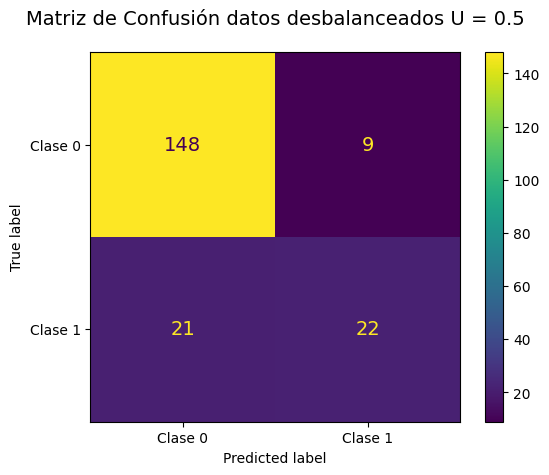

In [90]:
#generar dos clases desbalanceadas
x1,y1 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

#dividir nuestros datos para train y para test
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2, random_state=42)

#entrenamos
modelo1 = LogisticRegression(max_iter=500)
modelo1.fit(x1_train,y1_train)

#realizar predicciones
y1_pred = modelo1.predict(x1_test)
y1_pred_prob = modelo1.predict_proba(x1_test)[:,1]

#creamos matriz de confusion
mc1 = confusion_matrix(y1_test,y1_pred)

mcd1 = ConfusionMatrixDisplay(mc1, display_labels=['Clase 0', 'Clase 1'])
mcd1.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos desbalanceados U = 0.5', pad=20, size=14)

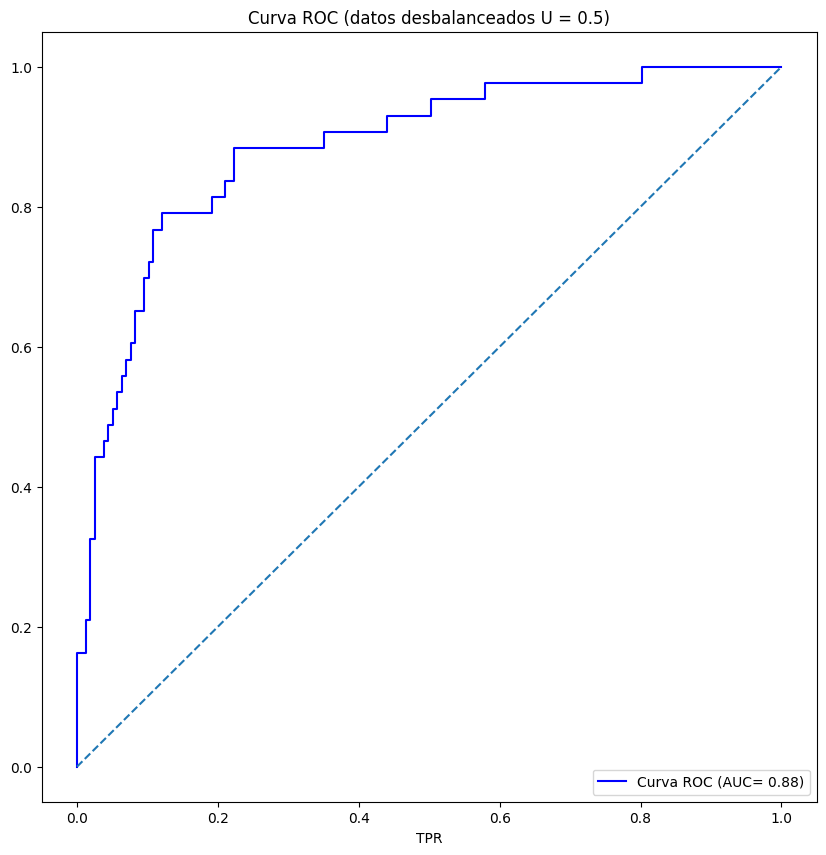

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       157
           1       0.71      0.51      0.59        43

    accuracy                           0.85       200
   macro avg       0.79      0.73      0.75       200
weighted avg       0.84      0.85      0.84       200



In [91]:
#calcular la tasa de fpr, y tpr
fpr1, tpr1, _ = roc_curve(y1_test, y1_pred_prob)
roc_auc1 = roc_auc_score(y1_test, y1_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr1,tpr1, color='blue', label=f'Curva ROC (AUC= {roc_auc1:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos desbalanceados U = 0.5)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y1_test,y1_pred))

Text(0.5, 1.0, 'Matriz de Confusión datos balanceados U = 0.5')

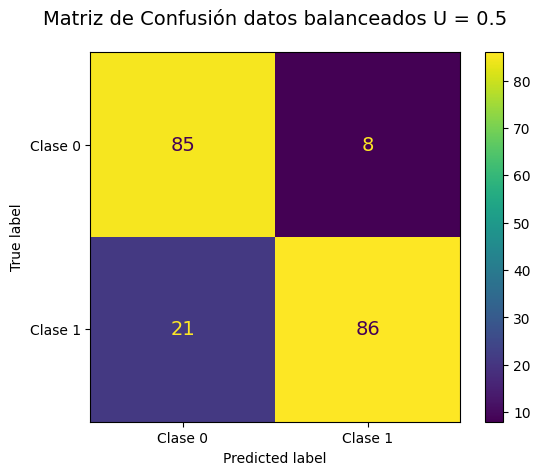

In [92]:
# Generar dos clases balanceadas
x2,y2 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.5, 0.5], random_state=42)

#dividir nuestros datos para train y para test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2, random_state=42)

#Entrenamos
modelo2 = LogisticRegression(max_iter=500)
modelo2.fit(x2_train,y2_train)

#realizar predicciones
y2_pred = modelo2.predict(x2_test)
y2_pred_prob = modelo2.predict_proba(x2_test)[:,1]

#creamos matriz de confusion
mc2 = confusion_matrix(y2_test,y2_pred)

mcd2 = ConfusionMatrixDisplay(mc2, display_labels=['Clase 0', 'Clase 1'])
mcd2.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos balanceados U = 0.5', pad=20, size=14)

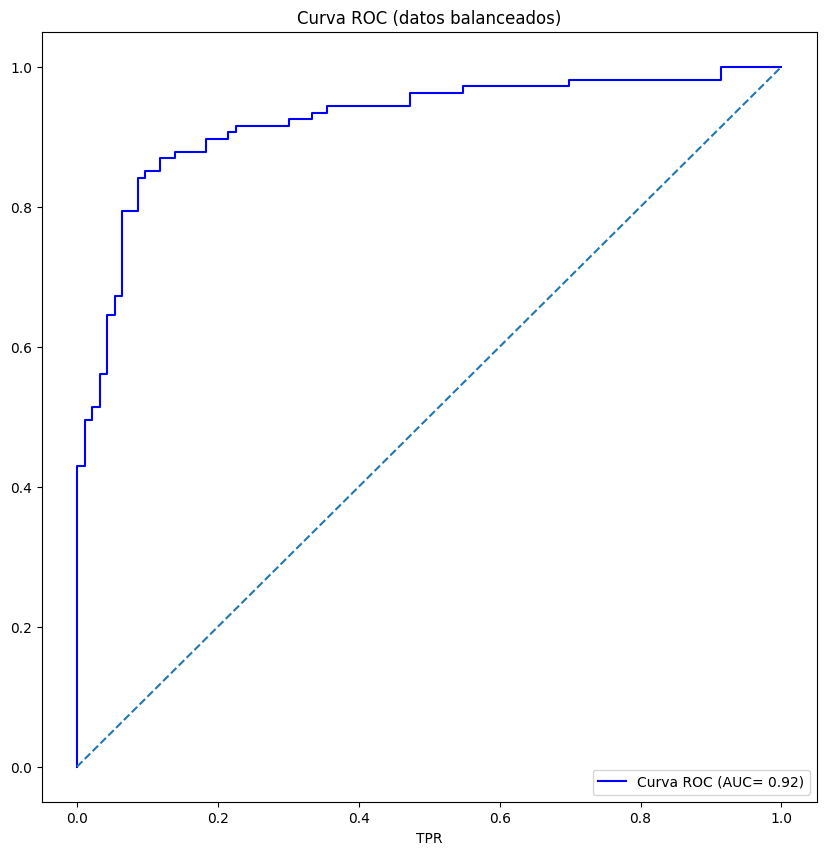

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [93]:
#calcular la tasa de fpr, y tpr
fpr2, tpr2, _ = roc_curve(y2_test, y2_pred_prob)
roc_auc2 = roc_auc_score(y2_test, y2_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr2,tpr2, color='blue', label=f'Curva ROC (AUC= {roc_auc2:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos balanceados)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y2_test,y2_pred))

Objetivo: Ajustar el umbral de clasificación en el conjunto de datos balanceados/desbalanceado y observar los cambios en la matriz de confusión y la curva ROC.

DATOS DESBALANCEADOS

Text(0.5, 1.0, 'Matriz de Confusión datos desbalanceados U = 0.3')

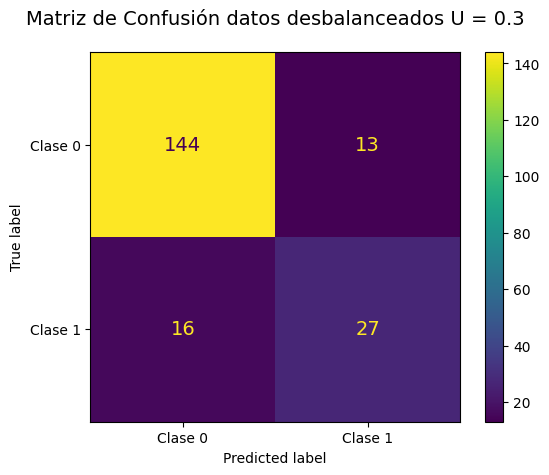

In [ ]:
# generar dos clases desbalanceadas
x3,y3 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

# dividir nuestros datos para train y para test
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2, random_state=42)

# entrenamos
modelo3 = LogisticRegression(max_iter=500)
modelo3.fit(x3_train,y3_train)

#realizar predicciones
y3_pred_prob = modelo3.predict_proba(x3_test)[:,1]
y3_pred = (y3_pred_prob >= 0.3).astype(int)

#creamos matriz de confusion
mc3 = confusion_matrix(y3_test,y3_pred)

mcd3 = ConfusionMatrixDisplay(mc3, display_labels=['Clase 0', 'Clase 1'])
mcd3.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos desbalanceados U = 0.3', pad=20, size=14)


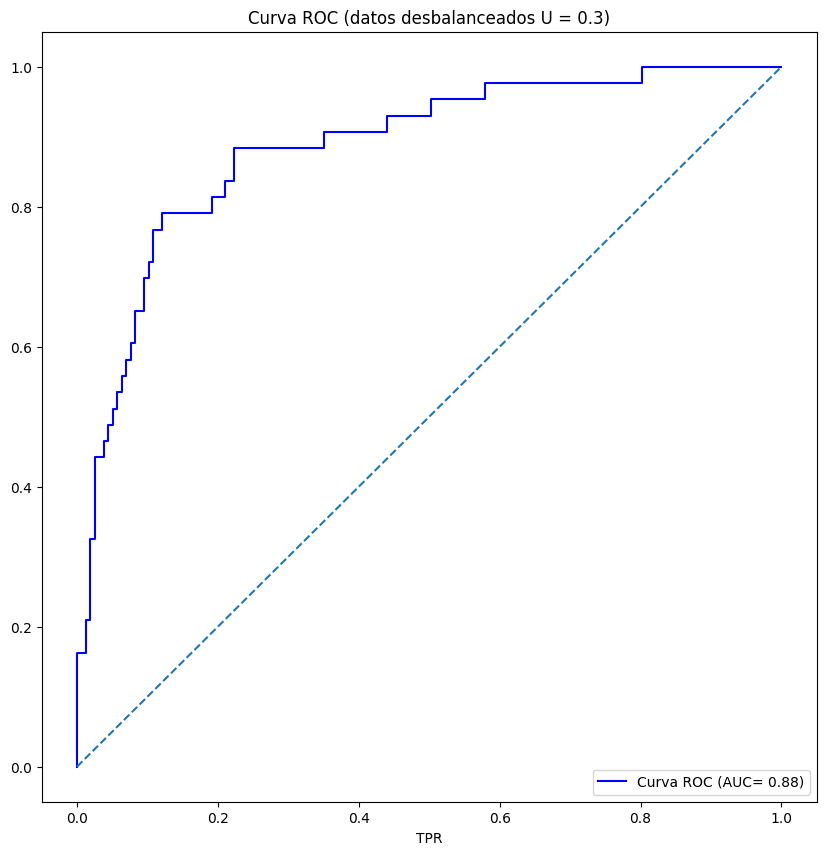

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       157
           1       0.68      0.63      0.65        43

    accuracy                           0.85       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.85      0.85      0.85       200



In [95]:
# calcular la tasa de fpr, y tpr
fpr3, tpr3, _ = roc_curve(y3_test, y3_pred_prob)
roc_auc3 = roc_auc_score(y3_test, y3_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr3,tpr3, color='blue', label=f'Curva ROC (AUC= {roc_auc3:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos desbalanceados U = 0.3)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y3_test,y3_pred))

¿Cómo cambia la matriz de confusión al ajustar el umbral de clasificación?

Al bajar el umbral a 0.3:

- Aumentan los verdaderos positivos (mejor detección de clase minoritaria)
- Aumentan ligeramente los falsos positivos
- Disminuyen los falsos negativos
- Disminuyen ligeramente los verdaderos negativos

¿Cómo afecta el ajuste del umbral a la curva ROC y al AUC-ROC?

- El AUC se mantiene en 0.88 ya que es independiente del umbral
- La curva ROC no cambia, solo el punto de operación en la curva

Observaciones:

- Bajar el umbral mejoró la detección de la clase minoritaria (más sensibilidad)
- El trade-off tuvo un ligero aumento en falsos positivos
- El modelo es más equilibrado con umbral 0.3 para datos desbalanceados
- La mejora en el F1-score de la clase minoritaria sugiere que 0.3 es un mejor umbral para este caso


DATOS BALANCEADOS

Text(0.5, 1.0, 'Matriz de Confusión datos balanceados U = 0.7')

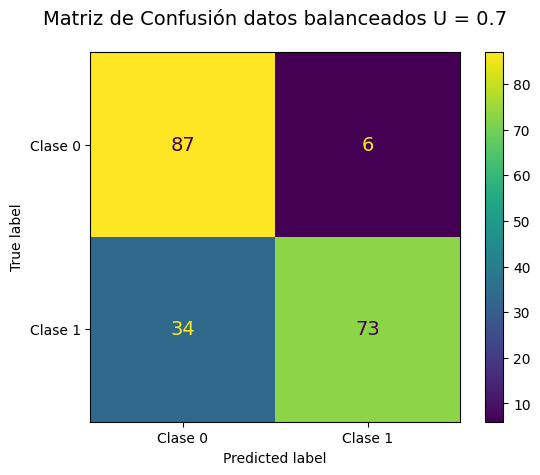

In [ ]:
# Generar dos clases balanceadas
x4,y4 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.5, 0.5], random_state=42)

#dividir nuestros datos para train y para test
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.2, random_state=42)

#Entrenamos
modelo4 = LogisticRegression(max_iter=500)
modelo4.fit(x4_train,y4_train)

#realizar predicciones
y4_pred_prob = modelo4.predict_proba(x4_test)[:,1]
y4_pred = (y4_pred_prob >= 0.7).astype(int)

#creamos matriz de confusion
mc4 = confusion_matrix(y4_test,y4_pred)

mcd4 = ConfusionMatrixDisplay(mc4, display_labels=['Clase 0', 'Clase 1'])
mcd4.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos balanceados U = 0.7', pad=20, size=14)

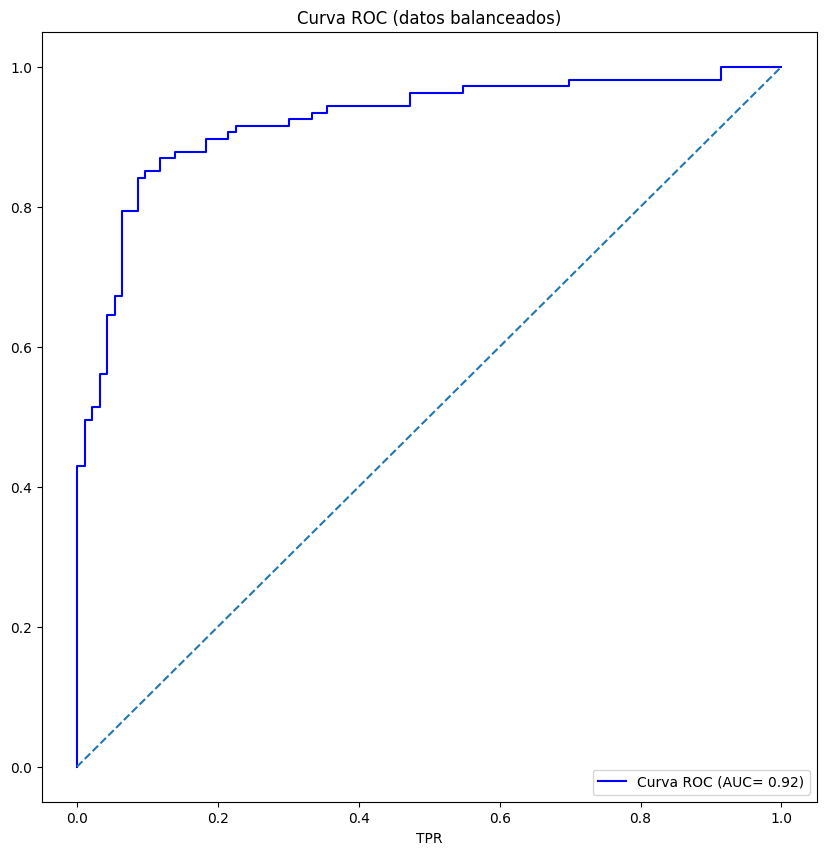

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        93
           1       0.92      0.68      0.78       107

    accuracy                           0.80       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.83      0.80      0.80       200



In [97]:
#calcular la tasa de fpr, y tpr
fpr4, tpr4, _ = roc_curve(y4_test, y4_pred_prob)
roc_auc4 = roc_auc_score(y4_test, y4_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr4,tpr4, color='blue', label=f'Curva ROC (AUC= {roc_auc4:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos balanceados)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y4_test,y4_pred))

¿Cómo cambia la matriz de confusión al ajustar el umbral de clasificación?

Al subir el umbral a 0.7:

- Disminuyen los verdaderos positivos
- Disminuyen los falsos positivos
- Aumentan los falsos negativos
- Aumentan ligeramente los verdaderos negativos

¿Cómo afecta el ajuste del umbral a la curva ROC y al AUC-ROC?

- El AUC se mantiene en 0.92
- La curva ROC no cambia, solo el punto de operación

Observaciones:

- El umbral 0.5 proporciona un mejor balance general para datos balanceados
- Subir el umbral a 0.7 hace el modelo más conservador (menos falsos positivos pero más falsos negativos)
- El modelo pierde rendimiento general con U=0.7 (accuracy baja de 0.85 a 0.80)
- Para datos balanceados, el umbral predeterminado de 0.5 parece ser la mejor opción

MANEJO DE CLASES DESBALANCEADAS CON TÉCNICAS DE SOBREMUESTREO Y SUBMUESTREO


In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Sobremuestreo

Text(0.5, 1.0, 'Matriz de Confusión datos desbalanceados sobremuestrados')

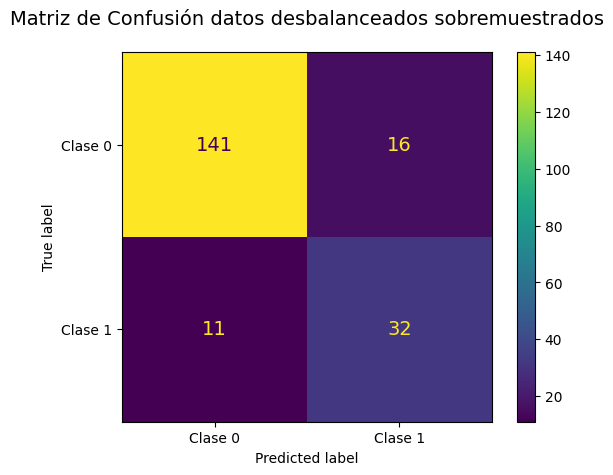

In [99]:
#generar dos clases desbalanceadas
x5,y5 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

#dividir nuestros datos para train y para test
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5,test_size=0.2, random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x5_train, y5_train)

# Entrenar el modelo con datos sobremuestreados
modelo_smote = LogisticRegression(max_iter=10000)
modelo_smote.fit(x_smote, y_smote)

#realizar predicciones
y5_pred = modelo_smote.predict(x5_test)
y5_pred_prob = modelo_smote.predict_proba(x5_test)[:,1]

#creamos matriz de confusion
mc5 = confusion_matrix(y5_test,y5_pred)

mcd5 = ConfusionMatrixDisplay(mc5, display_labels=['Clase 0', 'Clase 1'])
mcd5.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos desbalanceados sobremuestrados', pad=20, size=14)

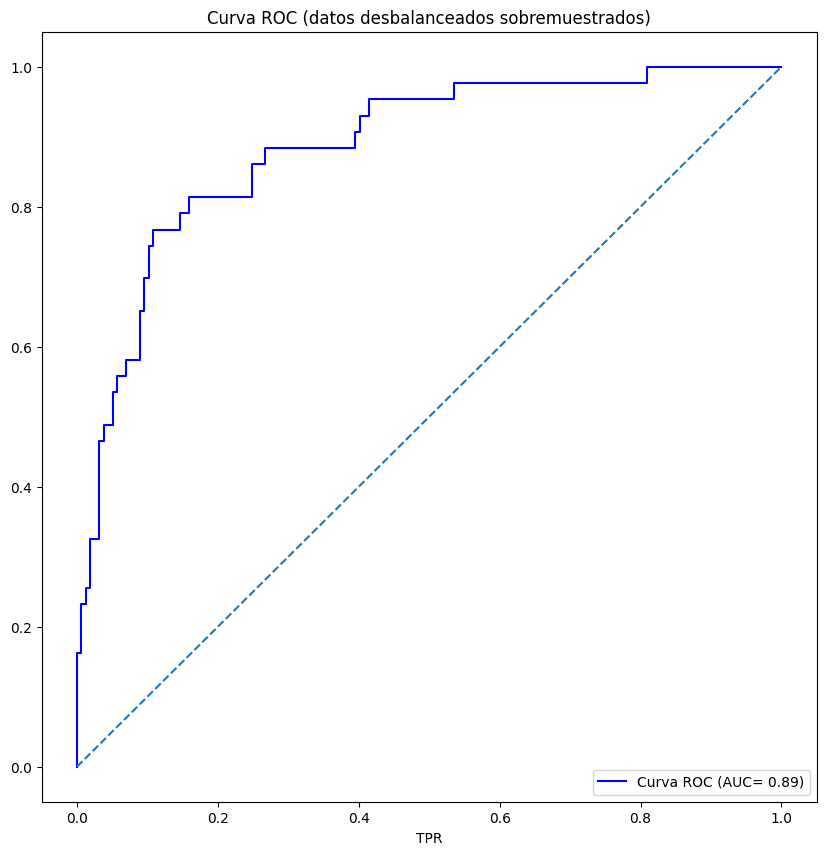

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       157
           1       0.67      0.74      0.70        43

    accuracy                           0.86       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.87      0.86      0.87       200



In [100]:
#calcular la tasa de fpr, y tpr
fpr5, tpr5, _ = roc_curve(y5_test, y5_pred_prob)
roc_auc5 = roc_auc_score(y5_test, y5_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr5,tpr5, color='blue', label=f'Curva ROC (AUC= {roc_auc5:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos desbalanceados sobremuestrados)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y5_test,y5_pred))

Submuestreo

Text(0.5, 1.0, 'Matriz de Confusión datos desbalanceados submuestrados')

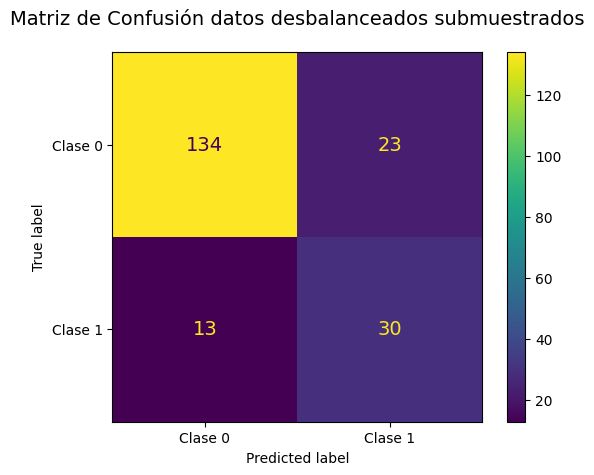

In [101]:
#generar dos clases desbalanceadas
x6,y6 = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.8, 0.2], random_state=42)

#dividir nuestros datos para train y para test
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6,test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x6_train, y6_train)

# Entrenar el modelo con datos submuestreados
modelo_rus = LogisticRegression(max_iter=10000)
modelo_rus.fit(x_rus, y_rus)

#realizar predicciones
y6_pred = modelo_rus.predict(x6_test)
y6_pred_prob = modelo_rus.predict_proba(x6_test)[:,1]

#creamos matriz de confusion
mc6 = confusion_matrix(y6_test,y6_pred)

mcd6 = ConfusionMatrixDisplay(mc6, display_labels=['Clase 0', 'Clase 1'])
mcd6.plot(values_format='d', text_kw={'size': 14})
plt.title('Matriz de Confusión datos desbalanceados submuestrados', pad=20, size=14)

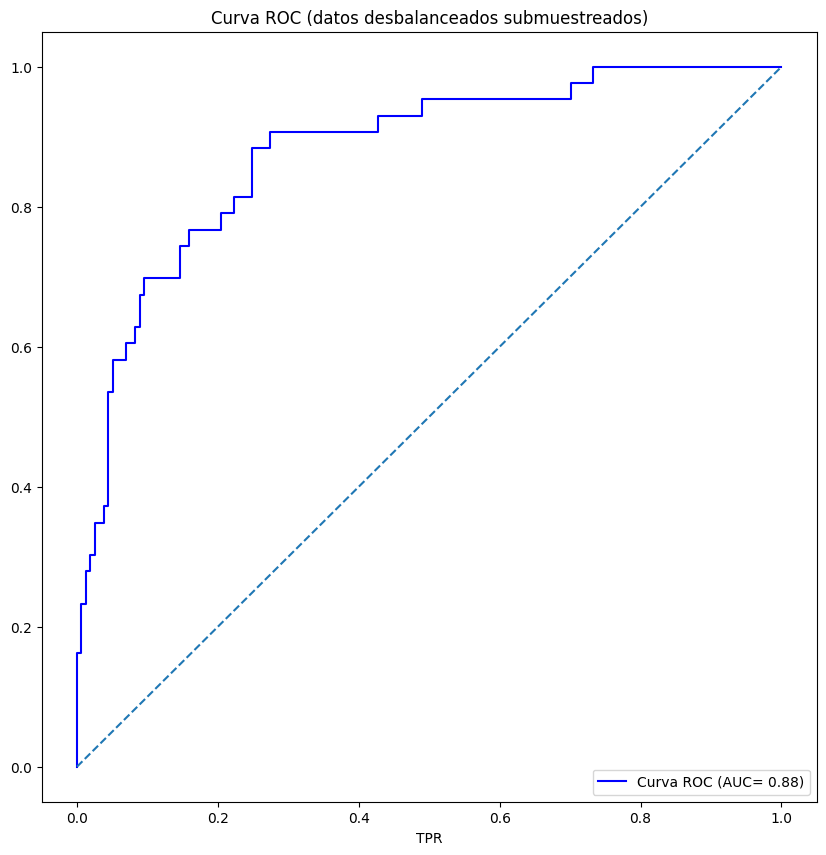

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        93
           1       0.92      0.68      0.78       107

    accuracy                           0.80       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.83      0.80      0.80       200



In [102]:
#calcular la tasa de fpr, y tpr
fpr6, tpr6, _ = roc_curve(y6_test, y6_pred_prob)
roc_auc6 = roc_auc_score(y6_test, y6_pred_prob)

plt.figure(figsize=(10,10))
plt.plot(fpr6,tpr6, color='blue', label=f'Curva ROC (AUC= {roc_auc6:.2f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.title('Curva ROC (datos desbalanceados submuestreados)')
plt.legend(loc = 'lower right')
plt.show()

print(classification_report(y4_test,y4_pred))

¿Cómo cambia la matriz de confusión al aplicar técnicas de sobremuestreo y submuestreo?

Sobremuestreo:
- Mejora en la detección de la clase minoritaria
- Ligero aumento en falsos positivos
- Reducción de falsos negativos
- Mantiene un buen balance de verdaderos negativos

Submuestreo:
- También mejora la detección de la clase minoritaria
- Mayor aumento en falsos positivos que SMOTE
- Reducción de falsos negativos
- Mayor pérdida de verdaderos negativos

¿Qué técnica (SMOTE o submuestreo) proporciona un mejor rendimiento en términos de AUC-ROC?

- SMOTE proporciona un mejor rendimiento, aunque la diferencia es muy pequeña
- La ventaja de SMOTE es que mejora la clasificación sin perder información de la clase mayoritaria
- El submuestreo no mejora el AUC-ROC respecto a los datos originales

¿Qué observaciones puedes hacer sobre el impacto del balanceo de clases en el rendimiento del modelo?

- SMOTE mantiene mejor el rendimiento general mientras mejora la clase minoritaria
- El submuestreo mejora significativamente la precisión de la clase minoritaria pero sacrifica rendimiento general
- Ambas técnicas logran su objetivo de mejorar la detección de la clase minoritaria, pero SMOTE lo hace de manera más equilibrada
